In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import pickle
import seaborn as sns
import pandas as pd
from copy import copy

from PIL import Image

from J_Model import PCModel
import J_utils as utils

from stimuli_data import *
from image_net_data import *

In [15]:
classes = ["n11939491", "n04330267", "n04326547", "n04328186", "n04330267", "n09468604", "n09472597", "n04522168", "n02974003",
           "n03220513", "n03223299", "n03240683", "n03355925", "n03930630", "n03837869", "n03773504", "n03530642", "n02701002", 
           "n02747177", "n02727426", "n02980441"]

In [3]:
for c in classes:
    print(f"{c} & {labels_dict[c]} \\\\")

n11939491 & daisy \\
n04330267 & stove \\
n04326547 & stone wall \\
n04328186 & stopwatch, stop watch \\
n04330267 & stove \\
n09468604 & valley, vale \\
n09472597 & volcano \\
n04522168 & vase \\
n02974003 & car wheel \\
n03220513 & dome \\
n03223299 & doormat, welcome mat \\
n03240683 & drilling platform, offshore rig \\
n03355925 & flagpole, flagstaff \\
n03930630 & pickup, pickup truck \\
n03837869 & obelisk \\
n03773504 & missile \\
n03530642 & honeycomb \\
n02701002 & ambulance \\
n02747177 & ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin \\
n02727426 & apiary, bee house \\
n02980441 & castle \\


## Compare Feature Convergence

In [4]:
with open("conv_results_june_05_dict.pickle", "rb") as file:
    conv_times_for_features = pickle.load(file)

In [5]:
df = pd.DataFrame(np.array([conv_times_for_features[key]['times'] for key in conv_times_for_features.keys()-[1]]).T, 
                  columns=[face_features_flip_dict[key] for key in conv_times_for_features.keys()-[1]])

In [6]:
df.head()

,1 Eye,2 Eyes,"1 Eye, Nose","1 Eye, Mouth","2 Eyes, Nose","1 Eye, Nose, Mouth",Full Face,"2 Eyes, Mouth"
0,17.885,18.090,18.740,17.445,18.690,17.96,18.365,17.350
1,17.845,18.080,18.635,17.390,18.185,18.35,18.430,17.585
2,17.935,18.240,18.380,17.705,19.010,18.32,18.235,17.590
3,17.885,18.205,18.625,17.830,18.885,18.30,18.050,17.750
4,18.135,18.215,18.750,17.285,18.705,18.54,18.345,17.800


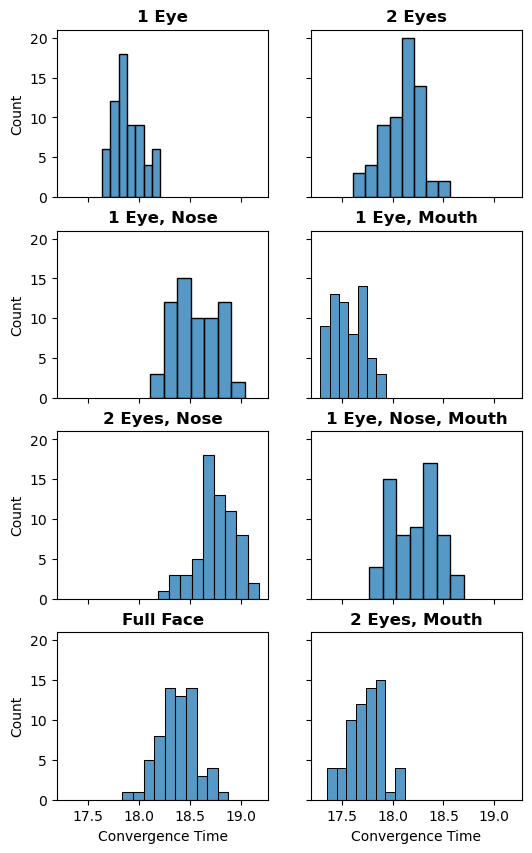

In [7]:
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(6, 10))

for i in range(len(df.columns)):
    sns.histplot(df, x=df.columns[i], stat="count", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(df.columns[i], weight='bold')
    axes[i//2, i%2].set_xlabel("")
axes[-1, 0].set_xlabel("Convergence Time")
axes[-1, 1].set_xlabel("Convergence Time")
plt.show()

In [9]:
for key in conv_times_for_features.keys():
    t_result = ttest_ind(conv_times_for_features[8]["times"],
                                                    conv_times_for_features[key]["times"],
                                                    equal_var=False,
                                                    alternative="less")
    print(f"t-test for feature {face_features_flip_dict[key]} gives \n{t_result}")

t-test for feature Cropped Eye gives 
Ttest_indResult(statistic=nan, pvalue=nan)
t-test for feature 1 Eye gives 
Ttest_indResult(statistic=16.16716447435576, pvalue=1.0)
t-test for feature 2 Eyes gives 
Ttest_indResult(statistic=8.412515772547138, pvalue=0.9999999999999627)
t-test for feature 1 Eye, Nose gives 
Ttest_indResult(statistic=-4.712858642374892, pvalue=3.2300831142257645e-06)
t-test for feature 1 Eye, Mouth gives 
Ttest_indResult(statistic=26.02257525150681, pvalue=1.0)
t-test for feature 2 Eyes, Nose gives 
Ttest_indResult(statistic=-11.07720011208177, pvalue=1.2470912545807136e-20)
t-test for feature 1 Eye, Nose, Mouth gives 
Ttest_indResult(statistic=4.413993691700276, pvalue=0.999989083922425)
t-test for feature Full Face gives 
Ttest_indResult(statistic=0.0, pvalue=0.5)
t-test for feature 2 Eyes, Mouth gives 
Ttest_indResult(statistic=20.044895894342275, pvalue=1.0)


In [10]:
t_result = ttest_ind(conv_times_for_features[7]["times"],
                    conv_times_for_features[8]["times"],
                    equal_var=False,
                    alternative="less")
print(f"t-test for feature {7} being less than feature 8 gives \n{t_result}")

t-test for feature 7 being less than feature 8 gives 
Ttest_indResult(statistic=-4.413993691700276, pvalue=1.0916077574963936e-05)


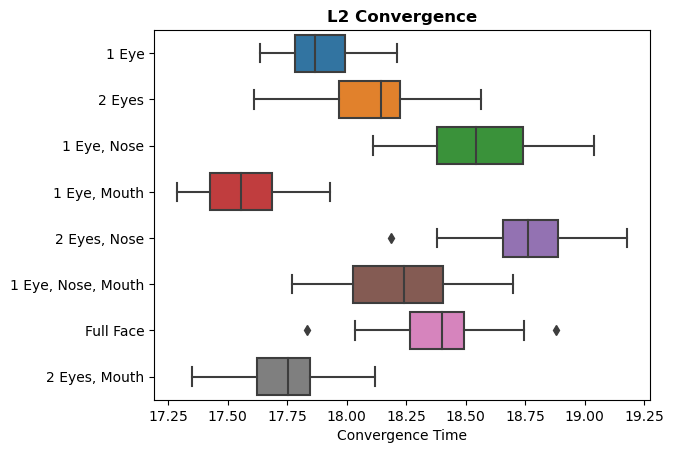

In [11]:
num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
convergence_times_ave = df.mean()
convergence_times_var = df.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df, orient="h")
ax.set_xlabel("Convergence Time")
plt.title("L2 Convergence", weight="bold")
plt.show()
#ax.tick_params(axis='x', labelrotation=30)

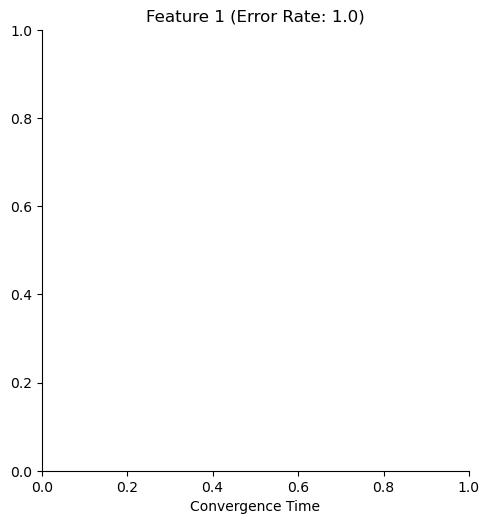

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


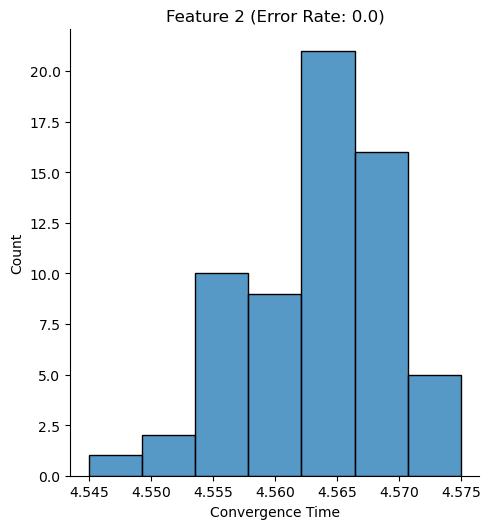

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


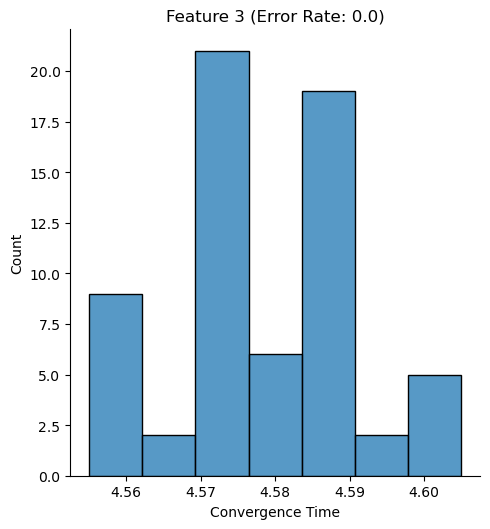

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


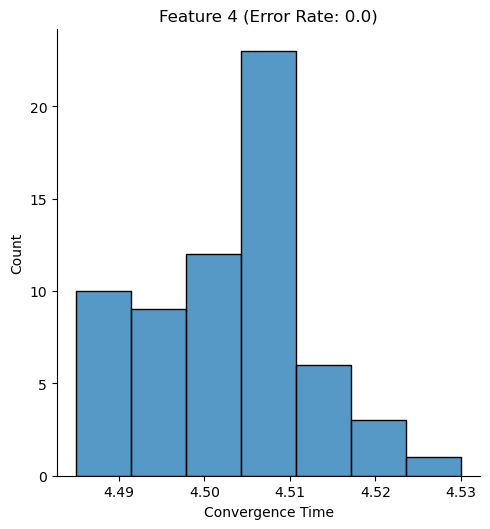

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


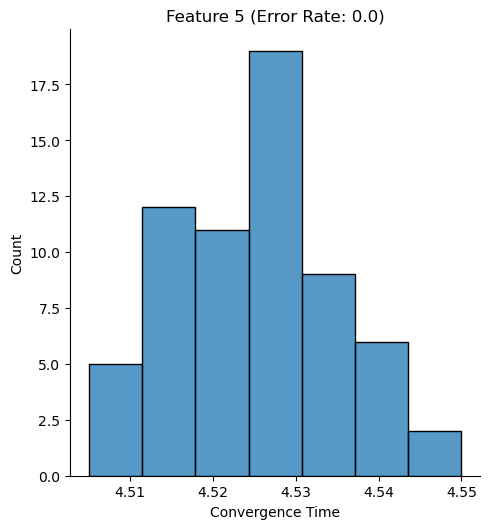

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


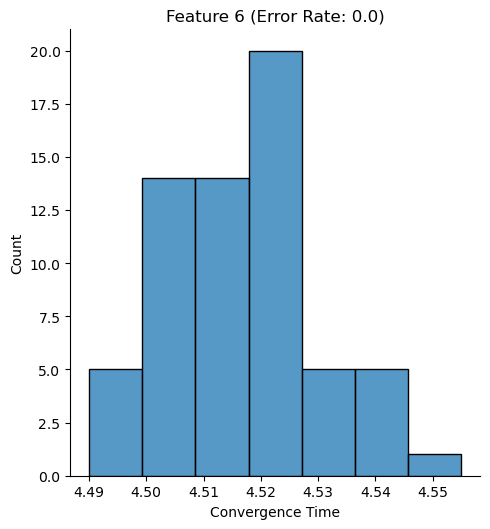

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


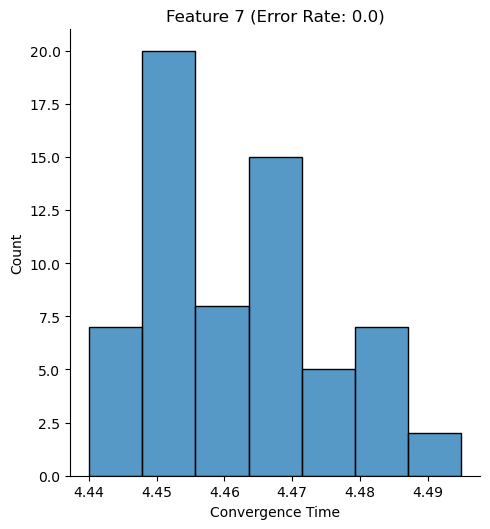

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


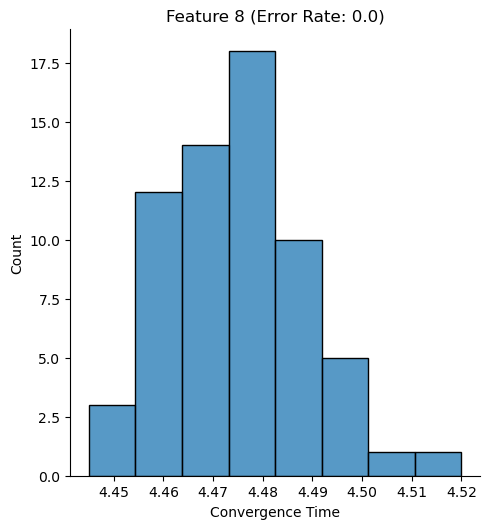

c:\Users\willp\Anaconda3\envs\predictive_coding\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


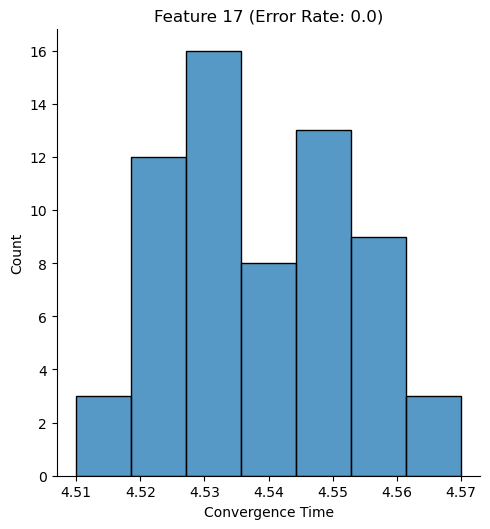

In [8]:
for key in conv_times_for_features.keys():
    ax = sns.displot(conv_times_for_features[key]["times"],
                stat="count")
    ax.set(xlabel="Convergence Time",
           title=f"Feature {face_features_flip_dict[key]} (Error Rate: {conv_times_for_features[key]['error_rate']})")
    #title-f"{face_features_dict[key]}"
    plt.show()

# L2 Convergence

In [19]:
model = PCModel(
    nodes=[2, 100, 300, 6800], #[2, 100, 300, 6800]
    mu_dt=0.005,
    act_fn=utils.Tanh(),
)
for idx, layer in enumerate(model.layers):
    with open(f'weights\\june_05_params_{idx}.pickle', 'rb') as file:
        layer.weights =pickle.load(file)

In [20]:
conv_times_L2 = {}

for feat_idx in list(range(1, 9)) + [17]: #iterate over all features
    test_dl = get_dataloader_features(feature=feat_idx, num_translations=0, num_rotations=0)
    conv_times = []
    #print(conv_times)
    acc = 0 
    with torch.no_grad():
        acc = 0
        for _, (img_batch, label_batch) in enumerate(test_dl):
            label_batch = label_batch.long()
            img_batch = img_batch.double()
            
            img_batch = utils.to_vector(img_batch)
            label_batch = utils.one_hot(label_batch,n_classes=2)

            label_preds, times = model.test_batch_supervised_errors(img_batch, label_batch, 20000, 
                                                    fixed_preds=False, tol=1e-4, norm="L2", mu_dt=0.005)
            
            for idx in range(len(times)):
                if (torch.argmax(label_preds[idx]).item() == torch.argmax(label_batch[idx]).item()) and (times[idx] is not None): #accurate & converged
                    conv_times.append(times[idx])

            acc += utils.Want_accuracy(label_preds, label_batch)
    
    #print(sorted(conv_times))
    conv_times_L2[feat_idx] = {"times":copy(conv_times), "error_rate":1-(acc/len(test_dl))}
    print(f"Done testing the {feat_idx} feature")

with open('conv_results_l2_dict.pickle', 'wb') as file:
    pickle.dump(conv_times_L2, file, protocol=pickle.HIGHEST_PROTOCOL)

Done testing the 1 feature
Done testing the 2 feature
Done testing the 3 feature
Done testing the 4 feature
Done testing the 5 feature
Done testing the 6 feature
Done testing the 7 feature
Done testing the 8 feature
Done testing the 17 feature


In [21]:
#with open("conv_results_l2_dict.pickle", "rb") as file:
#    conv_times_L2 = pickle.load(file)

In [22]:
df_L2 = pd.DataFrame(np.array([conv_times_L2[key]['times'] for key in conv_times_L2.keys()-[1]]).T, 
                  columns=[face_features_flip_dict[key] for key in conv_times_L2.keys()-[1]])

In [23]:
for key in conv_times_L2.keys():
    times = conv_times_L2[key]["times"]
    print(f"Feature {face_features_flip_dict[key]} has {64 - len(times)} not converged/not accurate (L2)")

for key in conv_times_L2.keys():
    t_result = ttest_ind(conv_times_L2[8]["times"],
                        conv_times_L2[key]["times"],
                        equal_var=False,
                        alternative="less")
    print(f"(L2) t-test for feature {face_features_flip_dict[key]} gives \n{t_result}")

Feature Cropped Eye has 64 not converged/not accurate (L2)
Feature 1 Eye has 0 not converged/not accurate (L2)
Feature 2 Eyes has 0 not converged/not accurate (L2)
Feature 1 Eye, Nose has 0 not converged/not accurate (L2)
Feature 1 Eye, Mouth has 0 not converged/not accurate (L2)
Feature 2 Eyes, Nose has 0 not converged/not accurate (L2)
Feature 1 Eye, Nose, Mouth has 0 not converged/not accurate (L2)
Feature Full Face has 0 not converged/not accurate (L2)
Feature 2 Eyes, Mouth has 0 not converged/not accurate (L2)
(L2) t-test for feature Cropped Eye gives 
Ttest_indResult(statistic=nan, pvalue=nan)
(L2) t-test for feature 1 Eye gives 
Ttest_indResult(statistic=11.814524211701858, pvalue=1.0)
(L2) t-test for feature 2 Eyes gives 
Ttest_indResult(statistic=9.43931165245591, pvalue=0.9999999999999587)
(L2) t-test for feature 1 Eye, Nose gives 
Ttest_indResult(statistic=25.50497193715271, pvalue=1.0)
(L2) t-test for feature 1 Eye, Mouth gives 
Ttest_indResult(statistic=32.25743621897568, 

In [24]:
t_result = ttest_ind(conv_times_L2[7]["times"],
                    conv_times_L2[8]["times"],
                    equal_var=False,
                    alternative="less")
print(f"(L1) t-test for feature {7} being less than feature 8 gives \n{t_result}")

(L1) t-test for feature 7 being less than feature 8 gives 
Ttest_indResult(statistic=-14.122275227852812, pvalue=4.591250768486547e-26)


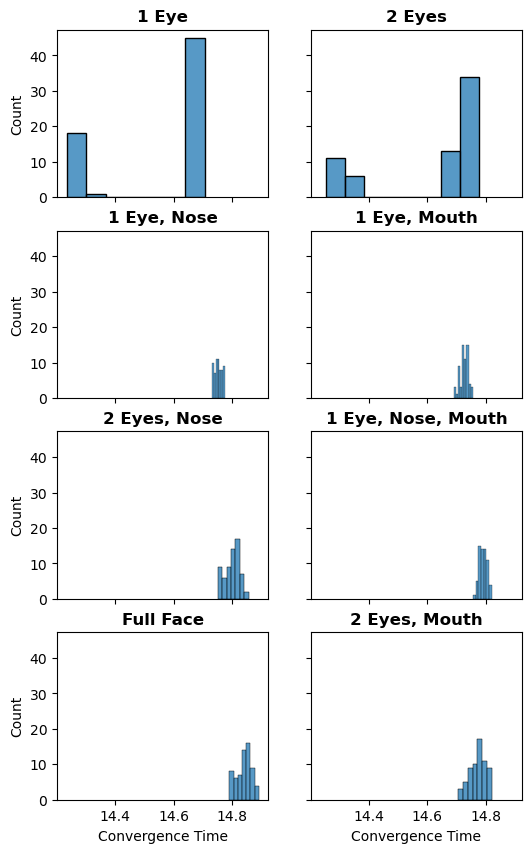

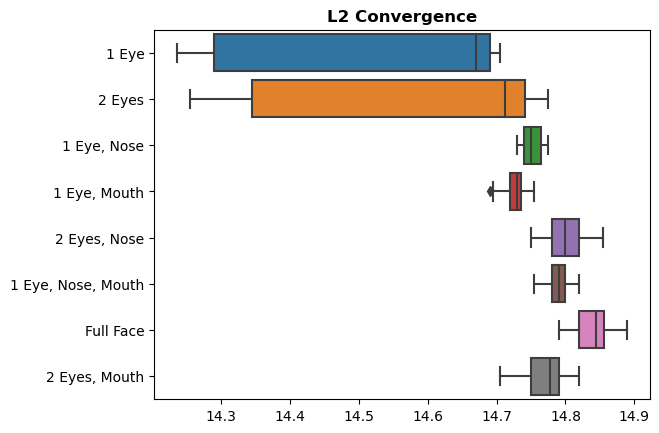

In [26]:
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(6, 10))

for i in range(len(df_L2.columns)):
    sns.histplot(df_L2, x=df_L2.columns[i], stat="count", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(df_L2.columns[i], weight='bold')
    axes[i//2, i%2].set_xlabel("")
axes[-1, 0].set_xlabel("Convergence Time")
axes[-1, 1].set_xlabel("Convergence Time")
plt.show()

#boxplot
num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
convergence_times_ave = df_L2.mean()
convergence_times_var = df_L2.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df_L2, orient="h")
#ax.tick_params(axis='x', labelrotation=30)
plt.title("L2 Convergence", weight="bold")
plt.show()

# L1 Convergence

In [27]:
model = PCModel(
    nodes=[2, 100, 300, 6800], #[2, 100, 300, 6800]
    mu_dt=0.005,
    act_fn=utils.Tanh(),
)
for idx, layer in enumerate(model.layers):
    with open(f'weights\\june_05_params_{idx}.pickle', 'rb') as file:
        layer.weights =pickle.load(file)

In [28]:
conv_times_L1 = {}

for feat_idx in list(range(1, 9)) + [17]: #iterate over all features
    test_dl = get_dataloader_features(feature=feat_idx, num_translations=0, num_rotations=0)
    conv_times = []
    #print(conv_times)
    acc = 0 
    with torch.no_grad():
        acc = 0
        for _, (img_batch, label_batch) in enumerate(test_dl):
            label_batch = label_batch.long()
            img_batch = img_batch.double()
            
            img_batch = utils.to_vector(img_batch)
            label_batch = utils.one_hot(label_batch,n_classes=2)

            label_preds, times = model.test_batch_supervised_errors(img_batch, label_batch, 20000, 
                                                    fixed_preds=False, tol=1e-4, norm="L1", mu_dt=0.005)
            
            for idx in range(len(times)):
                if (torch.argmax(label_preds[idx]).item() == torch.argmax(label_batch[idx]).item()) and (times[idx] is not None): #accurate & converged
                    conv_times.append(times[idx])

            acc += utils.Want_accuracy(label_preds, label_batch)
    
    #print(sorted(conv_times))
    conv_times_L1[feat_idx] = {"times":copy(conv_times), "error_rate":1-(acc/len(test_dl))}
    print(f"Done testing the {feat_idx} feature")

with open('conv_results_l1_dict.pickle', 'wb') as file:
    pickle.dump(conv_times_L1, file, protocol=pickle.HIGHEST_PROTOCOL)

Done testing the 1 feature
Done testing the 2 feature
Done testing the 3 feature
Done testing the 4 feature
Done testing the 5 feature
Done testing the 6 feature
Done testing the 7 feature
Done testing the 8 feature
Done testing the 17 feature


In [29]:
#with open("conv_results_l1_dict.pickle", "rb") as file:
#    conv_times_l2 = pickle.load(file)

In [30]:
for key in conv_times_L1.keys()-[1]:
    print(len(conv_times_L1[key]['times']))

64
64
64
64
64
64
64
64


In [31]:
np.array([conv_times_L1[key]['times'] for key in conv_times_L1.keys()-[1]])

array([[47.575, 45.845, 47.425, 46.315, 48.42 , 45.295, 46.57 , 46.5  ,
        47.58 , 45.475, 50.15 , 47.545, 46.9  , 47.435, 49.4  , 49.35 ,
        47.555, 47.145, 45.01 , 50.675, 47.205, 46.785, 48.415, 46.345,
        47.98 , 46.275, 48.19 , 51.285, 50.575, 50.425, 46.59 , 47.79 ,
        48.77 , 46.145, 45.615, 46.805, 47.51 , 46.405, 45.66 , 47.845,
        45.965, 46.865, 45.18 , 47.015, 47.8  , 44.035, 46.675, 46.275,
        50.125, 46.815, 47.715, 47.485, 47.635, 45.62 , 47.395, 47.78 ,
        47.37 , 47.32 , 46.33 , 46.855, 50.865, 50.775, 49.03 , 47.495],
       [47.15 , 56.19 , 49.   , 49.435, 47.775, 49.675, 48.075, 50.395,
        50.655, 47.255, 50.235, 46.25 , 49.13 , 48.04 , 50.21 , 47.79 ,
        50.485, 49.66 , 48.79 , 53.805, 48.62 , 47.175, 48.76 , 48.69 ,
        48.595, 46.89 , 47.405, 48.73 , 50.185, 46.81 , 49.515, 48.72 ,
        46.585, 46.175, 47.515, 47.405, 55.965, 48.085, 49.31 , 53.355,
        48.45 , 48.075, 48.845, 51.095, 52.11 , 49.695, 47.98 ,

In [32]:
df_L1 = pd.DataFrame(np.array([conv_times_L1[key]['times'] for key in conv_times_L1.keys()-[1]]).T, 
                  columns=[face_features_flip_dict[key] for key in conv_times_L1.keys()-[1]])

In [33]:
for key in conv_times_L1.keys():
    times = conv_times_L1[key]["times"]
    print(f"Feature {face_features_flip_dict[key]} has {64 - len(times)} not converged/not accurate (L1)")

for key in conv_times_L1.keys():
    t_result = ttest_ind(conv_times_L1[8]["times"],
                        conv_times_L1[key]["times"],
                        equal_var=False,
                        alternative="less")
    print(f"(L1) t-test for feature {face_features_flip_dict[key]} gives \n{t_result}")

Feature Cropped Eye has 64 not converged/not accurate (L1)
Feature 1 Eye has 0 not converged/not accurate (L1)
Feature 2 Eyes has 0 not converged/not accurate (L1)
Feature 1 Eye, Nose has 0 not converged/not accurate (L1)
Feature 1 Eye, Mouth has 0 not converged/not accurate (L1)
Feature 2 Eyes, Nose has 0 not converged/not accurate (L1)
Feature 1 Eye, Nose, Mouth has 0 not converged/not accurate (L1)
Feature Full Face has 0 not converged/not accurate (L1)
Feature 2 Eyes, Mouth has 0 not converged/not accurate (L1)
(L1) t-test for feature Cropped Eye gives 
Ttest_indResult(statistic=nan, pvalue=nan)
(L1) t-test for feature 1 Eye gives 
Ttest_indResult(statistic=-23.698280939078845, pvalue=9.89782205977068e-36)
(L1) t-test for feature 2 Eyes gives 
Ttest_indResult(statistic=-22.956120422718644, pvalue=6.858020843062681e-34)
(L1) t-test for feature 1 Eye, Nose gives 
Ttest_indResult(statistic=-19.097404641612407, pvalue=5.408086124960208e-29)
(L1) t-test for feature 1 Eye, Mouth gives 
T

In [34]:
t_result = ttest_ind(conv_times_L1[7]["times"],
                    conv_times_L1[8]["times"],
                    equal_var=False,
                    alternative="less")
print(f"(L1) t-test for feature {7} being less than feature 8 gives \n{t_result}")

(L1) t-test for feature 7 being less than feature 8 gives 
Ttest_indResult(statistic=-4.6995957939344475, pvalue=3.4384273059423176e-06)


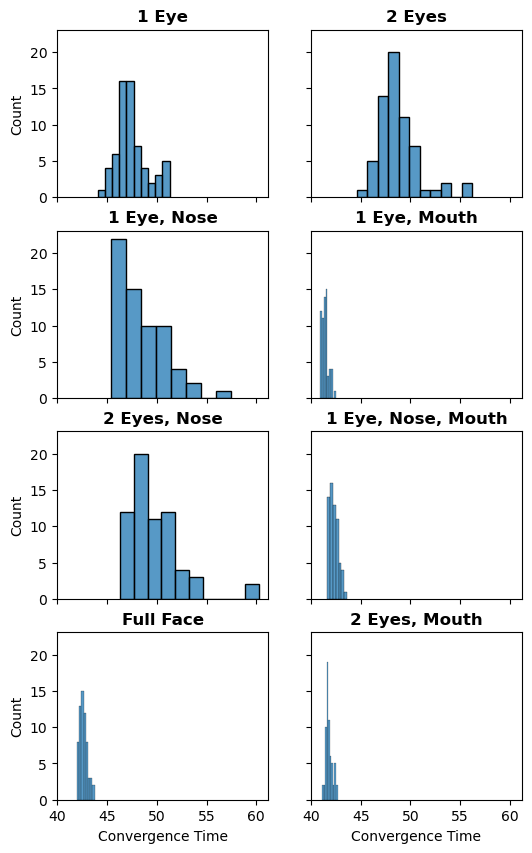

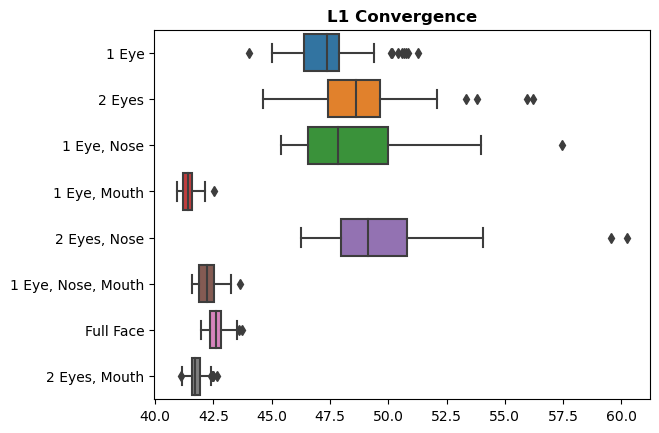

In [36]:
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(6, 10))

for i in range(len(df_L1.columns)):
    sns.histplot(df_L1, x=df_L1.columns[i], stat="count", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(df_L1.columns[i], weight='bold')
    axes[i//2, i%2].set_xlabel("")
axes[-1, 0].set_xlabel("Convergence Time")
axes[-1, 1].set_xlabel("Convergence Time")
plt.show()

#boxplot
num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
convergence_times_ave = df_L1.mean()
convergence_times_var = df_L1.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df_L1, orient="h")
#ax.tick_params(axis='x', labelrotation=30)
plt.title("L1 Convergence", weight="bold")
plt.show()

# Max Convergence

In [49]:
conv_times_Max = {}

for feat_idx in list(range(1, 9)) + [17]: #iterate over all features
    test_dl = get_dataloader_features(feature=feat_idx, num_translations=0, num_rotations=0)
    conv_times = []
    #print(conv_times)
    acc = 0 
    with torch.no_grad():
        acc = 0
        for _, (img_batch, label_batch) in enumerate(test_dl):
            label_batch = label_batch.long()
            img_batch = img_batch.double()
            
            img_batch = utils.to_vector(img_batch)
            label_batch = utils.one_hot(label_batch,n_classes=2)

            label_preds, times = model.test_batch_supervised_errors(img_batch, label_batch, 20000, 
                                                    fixed_preds=False, tol=1e-4, norm="Max", mu_dt=0.005)
            
            for idx in range(len(times)):
                if (torch.argmax(label_preds[idx]).item() == torch.argmax(label_batch[idx]).item()) and (times[idx] is not None): #accurate & converged
                    conv_times.append(times[idx])

            acc += utils.Want_accuracy(label_preds, label_batch)
    
    #print(sorted(conv_times))
    conv_times_Max[feat_idx] = {"times":copy(conv_times), "error_rate":1-(acc/len(test_dl))}
    print(f"Done testing the {feat_idx} feature")

with open('conv_results_max_dict.pickle', 'wb') as file:
    pickle.dump(conv_times_Max, file, protocol=pickle.HIGHEST_PROTOCOL)

Done testing the 1 feature
Done testing the 2 feature
Done testing the 3 feature
Done testing the 4 feature
Done testing the 5 feature
Done testing the 6 feature
Done testing the 7 feature
Done testing the 8 feature
Done testing the 17 feature


In [50]:
#with open("conv_results_max_dict.pickle", "rb") as file:
#    conv_times_Max = pickle.load(file)

In [51]:
df_Max = pd.DataFrame(np.array([conv_times_Max[key]['times'] for key in conv_times_Max.keys()-[1]]).T, 
                  columns=[face_features_flip_dict[key] for key in conv_times_Max.keys()-[1]])

In [52]:
for key in conv_times_Max.keys():
    times = conv_times_Max[key]["times"]
    print(f"Feature {face_features_flip_dict[key]} has {64 - len(times)} not converged/not accurate (Max)")

for key in conv_times_Max.keys():
    t_result = ttest_ind(conv_times_Max[8]["times"],
                        conv_times_Max[key]["times"],
                        equal_var=False,
                        alternative="less")
    print(f"(Max) t-test for feature {face_features_flip_dict[key]} gives \n{t_result}")

Feature Cropped Eye has 64 not converged/not accurate (Max)
Feature 1 Eye has 0 not converged/not accurate (Max)
Feature 2 Eyes has 0 not converged/not accurate (Max)
Feature 1 Eye, Nose has 0 not converged/not accurate (Max)
Feature 1 Eye, Mouth has 0 not converged/not accurate (Max)
Feature 2 Eyes, Nose has 0 not converged/not accurate (Max)
Feature 1 Eye, Nose, Mouth has 0 not converged/not accurate (Max)
Feature Full Face has 0 not converged/not accurate (Max)
Feature 2 Eyes, Mouth has 0 not converged/not accurate (Max)
(Max) t-test for feature Cropped Eye gives 
Ttest_indResult(statistic=nan, pvalue=nan)
(Max) t-test for feature 1 Eye gives 
Ttest_indResult(statistic=33.916894929936774, pvalue=1.0)
(Max) t-test for feature 2 Eyes gives 
Ttest_indResult(statistic=24.669275661180837, pvalue=1.0)
(Max) t-test for feature 1 Eye, Nose gives 
Ttest_indResult(statistic=23.378091993235333, pvalue=1.0)
(Max) t-test for feature 1 Eye, Mouth gives 
Ttest_indResult(statistic=34.46496180319941

In [53]:
t_result = ttest_ind(conv_times_Max[7]["times"],
                    conv_times_Max[8]["times"],
                    equal_var=False,
                    alternative="less")
print(f"(Max) t-test for feature {7} being less than feature 8 gives \n{t_result}")

(Max) t-test for feature 7 being less than feature 8 gives 
Ttest_indResult(statistic=-20.674776201850847, pvalue=3.117937897620042e-39)


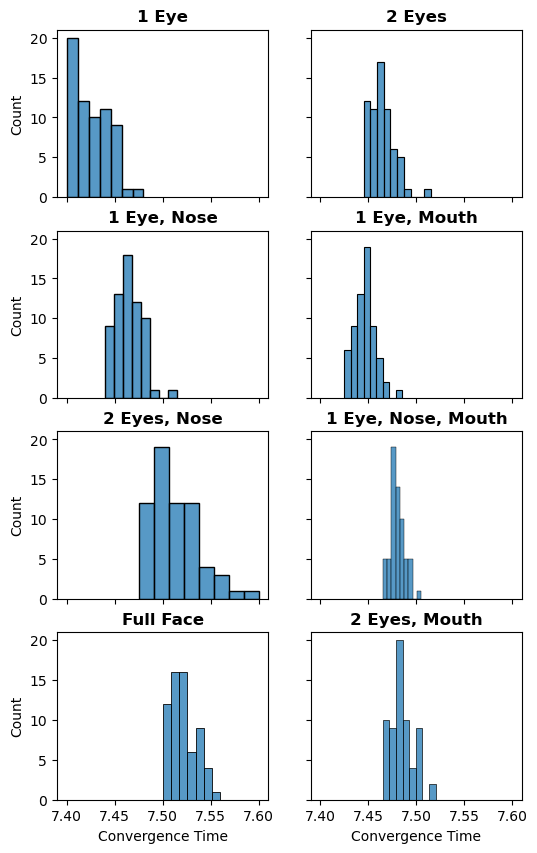

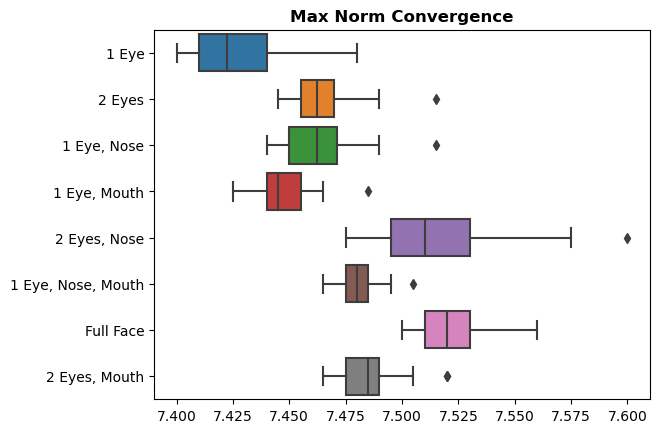

In [54]:
fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(6, 10))

for i in range(len(df_Max.columns)):
    sns.histplot(df_Max, x=df_Max.columns[i], stat="count", ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(df_Max.columns[i], weight='bold')
    axes[i//2, i%2].set_xlabel("")
axes[-1, 0].set_xlabel("Convergence Time")
axes[-1, 1].set_xlabel("Convergence Time")
plt.show()

#boxplot
num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
convergence_times_ave = df_Max.mean()
convergence_times_var = df_Max.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df_Max, orient="h")
#ax.tick_params(axis='x', labelrotation=30)
plt.title("Max Norm Convergence", weight="bold")
plt.show()

# Face Outline

In [16]:
model = PCModel(
    nodes=[2, 100, 300, 6800], #[2, 100, 300, 6800]
    mu_dt=0.005,
    act_fn=utils.Tanh(),
)
for idx, layer in enumerate(model.layers):
    with open(f'weights\\june_05_params_{idx}.pickle', 'rb') as file:
        layer.weights =pickle.load(file)

In [17]:
outline_dl = get_dataloader_outline(num_translations=0, num_rotations=0)

In [18]:
conv_times = []
#print(conv_times)
acc = 0 
with torch.no_grad():
    acc = 0
    for _, (img_batch, label_batch) in enumerate(outline_dl):
        label_batch = label_batch.long()
        img_batch = img_batch.double()
        
        img_batch = utils.to_vector(img_batch)
        label_batch = utils.one_hot(label_batch,n_classes=2)

        label_preds, times = model.test_batch_supervised_errors(img_batch, label_batch, 20000, 
                                                fixed_preds=False, tol=1e-4, norm="L1", mu_dt=0.005)
        
        for idx in range(len(times)):
            if (torch.argmax(label_preds[idx]).item() == torch.argmax(label_batch[idx]).item()) and (times[idx] is not None): #accurate & converged
                conv_times.append(times[idx])

        acc += utils.Want_accuracy(label_preds, label_batch)

acc = acc/len(outline_dl)
print(f"Face outline accuracy is {acc}")
print(f"There are {64-len(conv_times)} not accurate/not converged")

Face outline accuracy is 1.0
There are 32 not accurate/not converged


In [21]:
with open("conv_results_l1_dict.pickle", "rb") as file:
    conv_times_L1 = pickle.load(file)

In [24]:
df_outline = pd.DataFrame()
df_outline["Full Face"] = conv_times_L1[8]["times"]
df_outline["Outline"] = conv_times + [np.nan for i in range(32)]

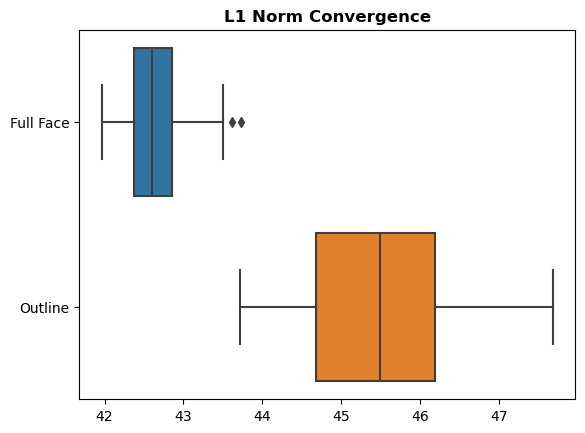

In [26]:
#boxplot
num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
convergence_times_ave = df_outline.mean()
convergence_times_var = df_outline.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df_outline, orient="h")
#ax.tick_params(axis='x', labelrotation=30)
plt.title("L1 Norm Convergence", weight="bold")
plt.show()

## Compare Inverted Faces Convergence

In [50]:
model = PCModel(
    nodes=[2, 100, 300, 6800], #[2, 100, 300, 6800]
    mu_dt=0.005,
    act_fn=utils.Tanh(),
)
for idx, layer in enumerate(model.layers):
    with open(f'weights\\june_05_params_{idx}.pickle', 'rb') as file:
        layer.weights =pickle.load(file)

In [ ]:
inverted_dl = None

## Compare Male/Female Convergence

In [ ]:
male_dl = None
female_dl = None

# Compare Parafoveal Feature Number

## L1

In [4]:
with open("conv_results_l1_dict.pickle", "rb") as file:
    conv_times_L1 = pickle.load(file)

In [5]:
df_L1 = pd.DataFrame(np.array([conv_times_L1[key]['times'] for key in conv_times_L1.keys()-[1]]).T, 
                  columns=[face_features_flip_dict[key] for key in conv_times_L1.keys()-[1]])

In [14]:
df_feature_num = pd.DataFrame()

max_size = 3*64

df_feature_num["0 Feature"] = pd.concat([df_L1["1 Eye"], pd.Series([np.nan for _ in range(max_size - len(df_L1["1 Eye"]))])], 
                                        ignore_index=True)
df_feature_num["1 Feature"] = pd.concat([df_L1["2 Eyes"], df_L1["1 Eye, Nose"], df_L1["1 Eye, Mouth"]], 
                                        ignore_index=True)
df_feature_num["2 Feature"] = pd.concat([df_L1["2 Eyes, Nose"], df_L1["1 Eye, Nose, Mouth"], df_L1["2 Eyes, Mouth"]], 
                                        ignore_index=True)
df_feature_num["3 Feature"] = pd.concat([df_L1["Full Face"], pd.Series([np.nan for _ in range(max_size - len(df_L1["Full Face"]))])], 
                                        ignore_index=True)

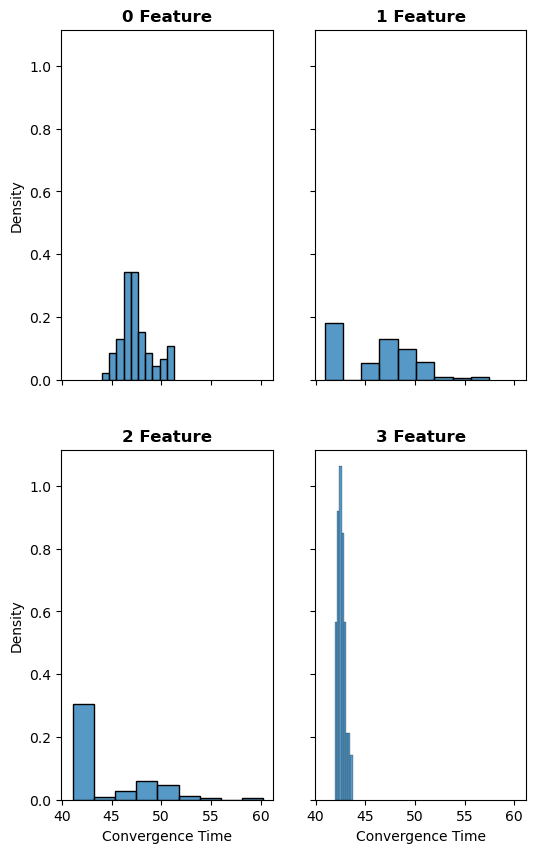

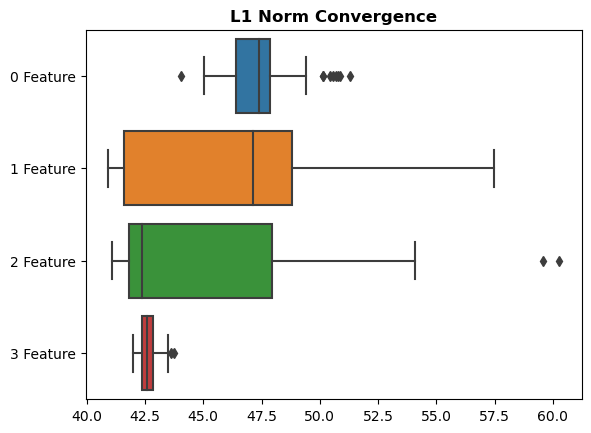

In [18]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 10))

#for i in range(len(df_feature_num.columns)):
#    sns.histplot(df_feature_num, x=df_feature_num.columns[i], stat="count", ax=axes[i%2, i%2])
#    axes[i%2, i%2].set_title(df_feature_num.columns[i], weight='bold')
#    axes[i%2, i%2].set_xlabel("")
sns.histplot(df_feature_num, x=df_feature_num.columns[0], stat="density", ax=axes[0, 0])
axes[0, 0].set_title(df_feature_num.columns[0], weight='bold')
axes[0, 0].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[1], stat="density", ax=axes[0, 1])
axes[0, 1].set_title(df_feature_num.columns[1], weight='bold')
axes[0, 1].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[2], stat="density", ax=axes[1, 0])
axes[1, 0].set_title(df_feature_num.columns[2], weight='bold')
axes[1, 0].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[3], stat="density", ax=axes[1, 1])
axes[1, 1].set_title(df_feature_num.columns[3], weight='bold')
axes[1, 1].set_xlabel("")

axes[-1, 0].set_xlabel("Convergence Time")
axes[-1, 1].set_xlabel("Convergence Time")
plt.show()

#boxplot
#num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
#convergence_times_ave = df_feature_num.mean()
#convergence_times_var = df_feature_num.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df_feature_num, orient="h")
#ax.tick_params(axis='x', labelrotation=30)
plt.title("L1 Norm Convergence", weight="bold")
plt.show()

In [27]:
for col in df_feature_num.columns:
    t_result = ttest_ind(df_feature_num["3 Feature"],
                        df_feature_num[col],
                        equal_var=False,
                        alternative="less",
                        nan_policy="omit")
    print(f"t-test for {col} against full face response time gives \n\t{t_result.pvalue}\n")

t-test for 0 Feature against full face response time gives 
	9.89782205977068e-36

t-test for 1 Feature against full face response time gives 
	1.04213307717335e-27

t-test for 2 Feature against full face response time gives 
	7.144291186707349e-11

t-test for 3 Feature against full face response time gives 
	0.5



## L2

In [2]:
with open("conv_results_l2_dict.pickle", "rb") as file:
    conv_times_L2 = pickle.load(file)

In [3]:
df_L2 = pd.DataFrame(np.array([conv_times_L2[key]['times'] for key in conv_times_L2.keys()-[1]]).T, 
                  columns=[face_features_flip_dict[key] for key in conv_times_L2.keys()-[1]])

In [4]:
df_feature_num = pd.DataFrame()

max_size = 3*64

df_feature_num["0 Feature"] = pd.concat([df_L2["1 Eye"], pd.Series([np.nan for _ in range(max_size - len(df_L2["1 Eye"]))])], 
                                        ignore_index=True)
df_feature_num["1 Feature"] = pd.concat([df_L2["2 Eyes"], df_L2["1 Eye, Nose"], df_L2["1 Eye, Mouth"]], 
                                        ignore_index=True)
df_feature_num["2 Feature"] = pd.concat([df_L2["2 Eyes, Nose"], df_L2["1 Eye, Nose, Mouth"], df_L2["2 Eyes, Mouth"]], 
                                        ignore_index=True)
df_feature_num["3 Feature"] = pd.concat([df_L2["Full Face"], pd.Series([np.nan for _ in range(max_size - len(df_L2["Full Face"]))])], 
                                        ignore_index=True)

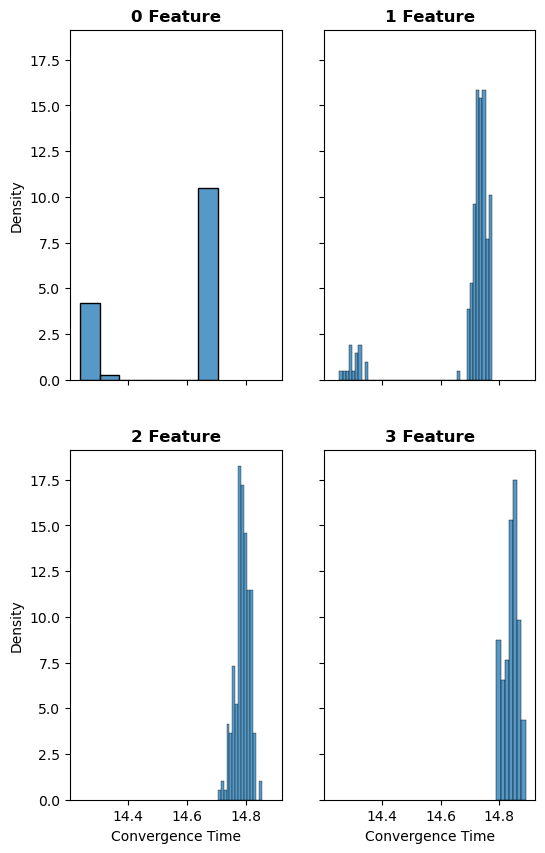

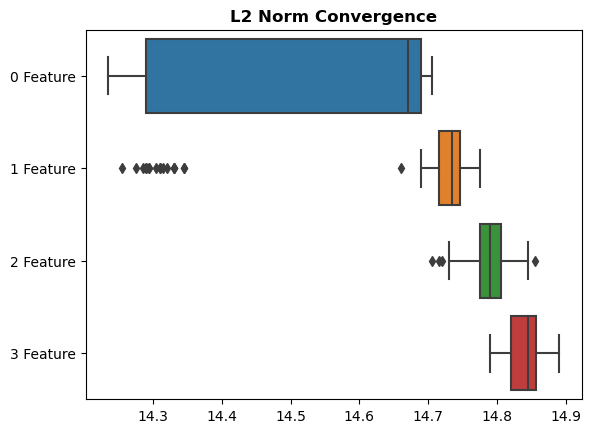

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 10))

#for i in range(len(df_feature_num.columns)):
#    sns.histplot(df_feature_num, x=df_feature_num.columns[i], stat="count", ax=axes[i%2, i%2])
#    axes[i%2, i%2].set_title(df_feature_num.columns[i], weight='bold')
#    axes[i%2, i%2].set_xlabel("")
sns.histplot(df_feature_num, x=df_feature_num.columns[0], stat="density", ax=axes[0, 0])
axes[0, 0].set_title(df_feature_num.columns[0], weight='bold')
axes[0, 0].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[1], stat="density", ax=axes[0, 1])
axes[0, 1].set_title(df_feature_num.columns[1], weight='bold')
axes[0, 1].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[2], stat="density", ax=axes[1, 0])
axes[1, 0].set_title(df_feature_num.columns[2], weight='bold')
axes[1, 0].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[3], stat="density", ax=axes[1, 1])
axes[1, 1].set_title(df_feature_num.columns[3], weight='bold')
axes[1, 1].set_xlabel("")

axes[-1, 0].set_xlabel("Convergence Time")
axes[-1, 1].set_xlabel("Convergence Time")
plt.show()

#boxplot
#num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
#convergence_times_ave = df_feature_num.mean()
#convergence_times_var = df_feature_num.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df_feature_num, orient="h")
#ax.tick_params(axis='x', labelrotation=30)
plt.title("L2 Norm Convergence", weight="bold")
plt.show()

In [6]:
for col in df_feature_num.columns:
    t_result = ttest_ind(df_feature_num["3 Feature"],
                        df_feature_num[col],
                        equal_var=False,
                        alternative="less",
                        nan_policy="omit")
    print(f"t-test for {col} against full face response time gives \n\t{t_result.pvalue}\n")

t-test for 0 Feature against full face response time gives 
	1.0

t-test for 1 Feature against full face response time gives 
	1.0

t-test for 2 Feature against full face response time gives 
	1.0

t-test for 3 Feature against full face response time gives 
	0.5



## Max

In [7]:
with open("conv_results_max_dict.pickle", "rb") as file:
    conv_times_Max = pickle.load(file)

In [8]:
df_Max = pd.DataFrame(np.array([conv_times_Max[key]['times'] for key in conv_times_Max.keys()-[1]]).T, 
                  columns=[face_features_flip_dict[key] for key in conv_times_Max.keys()-[1]])

In [9]:
df_feature_num = pd.DataFrame()

max_size = 3*64

df_feature_num["0 Feature"] = pd.concat([df_Max["1 Eye"], pd.Series([np.nan for _ in range(max_size - len(df_Max["1 Eye"]))])], 
                                        ignore_index=True)
df_feature_num["1 Feature"] = pd.concat([df_Max["2 Eyes"], df_Max["1 Eye, Nose"], df_Max["1 Eye, Mouth"]], 
                                        ignore_index=True)
df_feature_num["2 Feature"] = pd.concat([df_Max["2 Eyes, Nose"], df_Max["1 Eye, Nose, Mouth"], df_Max["2 Eyes, Mouth"]], 
                                        ignore_index=True)
df_feature_num["3 Feature"] = pd.concat([df_Max["Full Face"], pd.Series([np.nan for _ in range(max_size - len(df_Max["Full Face"]))])], 
                                        ignore_index=True)

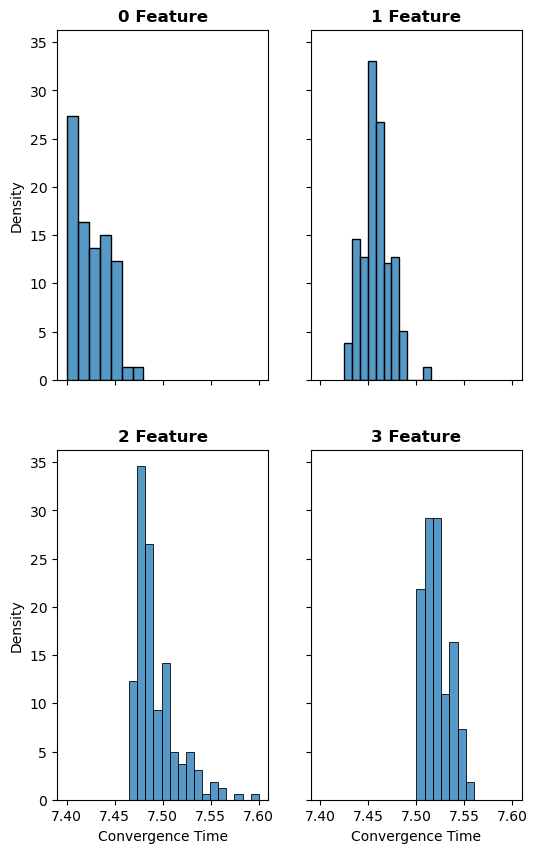

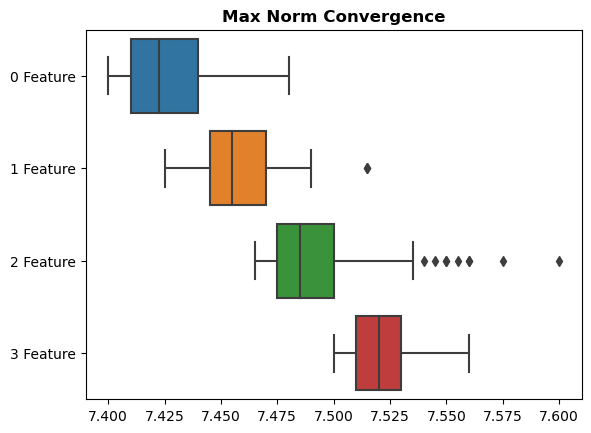

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 10))

#for i in range(len(df_feature_num.columns)):
#    sns.histplot(df_feature_num, x=df_feature_num.columns[i], stat="count", ax=axes[i%2, i%2])
#    axes[i%2, i%2].set_title(df_feature_num.columns[i], weight='bold')
#    axes[i%2, i%2].set_xlabel("")
sns.histplot(df_feature_num, x=df_feature_num.columns[0], stat="density", ax=axes[0, 0])
axes[0, 0].set_title(df_feature_num.columns[0], weight='bold')
axes[0, 0].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[1], stat="density", ax=axes[0, 1])
axes[0, 1].set_title(df_feature_num.columns[1], weight='bold')
axes[0, 1].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[2], stat="density", ax=axes[1, 0])
axes[1, 0].set_title(df_feature_num.columns[2], weight='bold')
axes[1, 0].set_xlabel("")

sns.histplot(df_feature_num, x=df_feature_num.columns[3], stat="density", ax=axes[1, 1])
axes[1, 1].set_title(df_feature_num.columns[3], weight='bold')
axes[1, 1].set_xlabel("")

axes[-1, 0].set_xlabel("Convergence Time")
axes[-1, 1].set_xlabel("Convergence Time")
plt.show()

#boxplot
#num_features = [1, 2, 2, 2, 3, 3, 3, 4, 3]
#convergence_times_ave = df_feature_num.mean()
#convergence_times_var = df_feature_num.var()
#print(convergence_times_ave)

fig, ax = plt.subplots()
sns.boxplot(df_feature_num, orient="h")
#ax.tick_params(axis='x', labelrotation=30)
plt.title("Max Norm Convergence", weight="bold")
plt.show()

In [11]:
for col in df_feature_num.columns:
    t_result = ttest_ind(df_feature_num["3 Feature"],
                        df_feature_num[col],
                        equal_var=False,
                        alternative="less",
                        nan_policy="omit")
    print(f"t-test for {col} against full face response time gives \n\t{t_result.pvalue}\n")

t-test for 0 Feature against full face response time gives 
	1.0

t-test for 1 Feature against full face response time gives 
	1.0

t-test for 2 Feature against full face response time gives 
	1.0

t-test for 3 Feature against full face response time gives 
	0.5



# Finding Average Accuracy for Shuffled Faces

Confidence Level        z-value

0.90 	1.645

0.95 	1.96

0.99 	2.58

In [ ]:
model = PCModel(
    nodes=[2, 100, 300, 6800], #[2, 100, 300, 6800]
    mu_dt=0.005,
    act_fn=utils.Tanh(),
)
for idx, layer in enumerate(model.layers):
    with open(f'weights\\june_05_params_{idx}.pickle', 'rb') as file:
        layer.weights =pickle.load(file)

In [ ]:
n = 20

accs = []
for i in range(n):
    shuffle_dl = get_dataloader_shuffled(num_rotations=0, num_translations=0)

    with torch.no_grad():
        acc = 0
        #conv_times = []
        for _, (img_batch, label_batch) in enumerate(shuffle_dl):
            label_batch = label_batch.long()
            img_batch = img_batch.double()
            
            img_batch = utils.to_vector(img_batch)
            label_batch = utils.one_hot(label_batch,n_classes=2)

            label_preds, times = model.test_batch_supervised(img_batch, label_batch, 10000, 
                                                    fixed_preds=False, tol=1e-4, norm="Max", mu_dt=0.005,)
            
            #conv_times += times
            acc += utils.Want_accuracy(label_preds, label_batch)
        accs.append(acc / len(shuffle_dl))
        #print(f"Shuffled faces has Accuracy: {acc / len(shuffle_dl)}\n")

accs = np.array(accs)

In [ ]:
accs_mean - np.mean(accs)
accs_std - np.std(accs)
z = 1.96
print(f"Shuffled faces have average validation accuracy {accs_mean} +/- {z*accs_std}")

In [ ]:
n = 20

accs_bs = []
for i in range(n):
    shuffle_dl = get_dataloader_block_shuffled(num_rotations=0, num_translations=0)

    with torch.no_grad():
        acc = 0
        #conv_times = []
        for _, (img_batch, label_batch) in enumerate(shuffle_dl):
            label_batch = label_batch.long()
            img_batch = img_batch.double()
            
            img_batch = utils.to_vector(img_batch)
            label_batch = utils.one_hot(label_batch,n_classes=2)

            label_preds, times = model.test_batch_supervised(img_batch, label_batch, 10000, 
                                                        fixed_preds=False, tol=1e-4, norm="Max", mu_dt=0.005,)
            
            #conv_times += times
            acc += utils.Want_accuracy(label_preds, label_batch)
        accs_bs.append(acc / len(shuffle_dl))
        #print(f"Shuffled faces has Accuracy: {acc / len(shuffle_dl)}\n")

accs_bs = np.array(accs_bs)

In [ ]:
accs_bs_mean - np.mean(accs_bs)
accs_bs_std - np.std(accs_bs)
z = 1.96
print(f"Block-shuffled faces have average validation accuracy {accs_bs_mean} +/- {z*accs_bs_std}")

# Confusion Matrix

In [12]:
model = PCModel(
    nodes=[2, 100, 300, 6800], #[2, 100, 300, 6800]
    mu_dt=0.005,
    act_fn=utils.Tanh(),
)
for idx, layer in enumerate(model.layers):
    with open(f'weights\\june_05_params_{idx}.pickle', 'rb') as file:
        layer.weights =pickle.load(file)

In [29]:
"""
    predicted   |  positive       | negative
actual          |
positive        |  true positive  |  false negative
negative        |  false positive |  true negative
"""
confusion_matrix = np.zeros((2, 2))

In [16]:
face_loader = get_dataloader(classes=classes, radius=(2, 3),
                            num_translations=3, num_rotations=3, num_images=123, augment_imagenet=False)

In [30]:
for _, (img_batch, label_batch) in enumerate(face_loader):
    label_batch = label_batch.long()
    img_batch = img_batch.double()
    
    img_batch = utils.to_vector(img_batch)
    label_batch = utils.one_hot(label_batch,n_classes=2)

    label_preds, t = model.test_batch_supervised(img_batch, label_batch, 1000, 
                                                    fixed_preds=False, tol=1e-10, norm="L1")
    #print(t)
    for i in range(label_batch.shape[0]):
        target = label_batch[i]
        prediction = label_preds[i]

        if torch.argmax(target) == 0: #not a face
            if torch.argmax(prediction) == 0: #true negative
                confusion_matrix[1][1] += 1
            else: #false positive
                confusion_matrix[1][0] += 1
        else: #face
            if torch.argmax(prediction) == 1: #true positive
                confusion_matrix[0][0] += 1
            else: #false negative
                confusion_matrix[0][1] += 1

In [31]:
print(f"Accuracy: {(confusion_matrix[0][0] + confusion_matrix[1][1])/np.sum(confusion_matrix)}")

Accuracy: 0.957258064516129


In [32]:
print(confusion_matrix)

[[439.   9.]
 [ 44. 748.]]


In [51]:
accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1])/np.sum(confusion_matrix)
precision = confusion_matrix[0][0]/(confusion_matrix[0][0]+ confusion_matrix[1][0])
recall = confusion_matrix[0][0]/(confusion_matrix[0][0]+ confusion_matrix[0][1]) #true positive, power, sensitivity
F1_score = 2*precision*recall/(precision + recall)
specificity = confusion_matrix[1][1]/(confusion_matrix[1][1]+ confusion_matrix[1][0]) #true negative
false_omission_rate = confusion_matrix[0][1]/(confusion_matrix[0][1]+ confusion_matrix[1][1])
false_positive_rate = 1 - specificity
balanced_accuracy = 0.5*(recall + specificity)
prevalence_threshold = (np.sqrt(recall*false_positive_rate) - false_positive_rate)/(recall-false_positive_rate)

In [52]:
print(f"Accuracy {accuracy}")
print(f"Precision {precision}")
print(f"Recall (Sensitivity) {recall}")
print(f"F1 Score {F1_score}")
print(f"Specificity {specificity}")
print(f"False Omission Rate {false_omission_rate}")
print(f"False Positive Rate {false_positive_rate}")
print(f"Balanced Accuracy {balanced_accuracy}")
print(f"Prevalence Threshold {prevalence_threshold}")

Accuracy 0.957258064516129
Precision 0.9089026915113871
Recall (Sensitivity) 0.9799107142857143
F1 Score 0.9430719656283566
Specificity 0.9444444444444444
False Omission Rate 0.011889035667107
False Positive Rate 0.05555555555555558
Balanced Accuracy 0.9621775793650793
Prevalence Threshold 0.19231476841452716


# Rough Work

In [2]:
model = PCModel(
    nodes=[2, 100, 300, 6800], #[2, 100, 300, 6800]
    mu_dt=0.005,
    act_fn=utils.Tanh(),
)
for idx, layer in enumerate(model.layers):
    with open(f'weights\\june_05_params_{idx}.pickle', 'rb') as file:
        layer.weights =pickle.load(file)

In [3]:
test_dl = get_dataloader_features(feature=8, num_translations=0, num_rotations=0)

In [10]:
img_batch, label_batch = next(iter(test_dl))

label_batch = label_batch.long()
img_batch = img_batch.double()

img_batch = utils.to_vector(img_batch)
label_batch = utils.one_hot(label_batch,n_classes=2)

label_preds, times = model.test_batch_supervised_errors(img_batch, label_batch, 10000, 
                                    fixed_preds=False, tol=1e-4, norm="L2", mu_dt=0.005)

In [11]:
print(label_preds)
print(times)

tensor([[0.4847, 1.1202],
        [0.4716, 1.1472],
        [0.4861, 1.1986],
        [0.5035, 1.2228],
        [0.4859, 1.1516],
        [0.4823, 1.1840],
        [0.4830, 1.1440],
        [0.4915, 1.1073]])
[14.315, 14.83, 14.315, 14.86, 14.355, 14.395, 14.27, 14.355]


ValueError: x and y can be no greater than 2D, but have shapes (10,) and (10, 8, 7200)

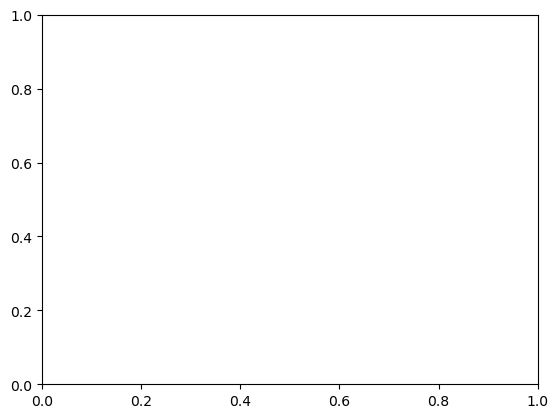

In [7]:
plt.plot(errors)

In [12]:
test = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
test.head()

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [16]:
test == test

,0,1,2
0,True,True,True
1,True,True,True
2,True,True,True


In [29]:
test2 = test.where(test == pd.Series([1, 2]))

test2.head()

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.